# Lecture 17:  Classes II



### Special Methods and Operator Overloading

**Special methods.** Method names starting and ending with `__` such as `__init__` and `__str__` are special.  Python has other special methods that, whenever it is appropriate, we can "customize."

When we are changing an operator or methods default behaviour, we say we are "overloading" it.  For example, Python lets us "customize" or override the default behavior of the following logical and arithmetic operators.

| Operator  | Special method | Purpose |
| ------------- | ------------- |------------- |
| `+`  | `__add__`  | Addition |
| `-`  | `__sub__`  | Subtraction |
| `*`  | `__mul__`  | Multiplication |
| `%`  | `__mod__`  | Remainder |
| `/`  | `__truediv__`  | Floating pt division |
| `//`  | `__floordiv__`  | Integer division |
| `==`  | `__eq__`  | Equal to |
| `<` | `__lt__`  | Less than |
| `>`  | `__gt__`  | Greater than |
| `<=` | `__le__`  | Less than or equal to |
| `>=` | `__ge__`  | Greater than or equal to |


In [1]:
class Name(object): # optional parent class
    """Class to represent a person's name."""
    __slots__ = ['_f', '_m', '_l']
    
    def __init__(self, first, last, middle=''):
        self._f = first
        self._m = middle
        self._l = last
    
    def __eq__(self, other): # both first, last name same in lower case
        return (self._f.lower() == other._f.lower()) and (self._l.lower() == other._l.lower())

    def __lt__(self, other): # compare first letter of last name in lower case
        return (self._l[0].lower() < other._l[0].lower())
    
    def __gt__(self, other): # compare first letter of last name in lower case
        return not self.__lt__(other)

In [2]:
Name('Harry', 'Potter', 'James') == Name('harry', 'potter')

True

In [3]:
Name('Iris', 'Howley', 'K') == Name('I', 'Howley', 'K')

False

In [4]:
Name('Shikha', 'Singh') < Name('Iris', 'Howley')

False

In [5]:
print(Name('Shikha', 'Singh') > Name('Iris', 'Howley'))

True


### Operator Overloading in the Coordinate Class

In the last lecture we defined the following methods for the coordinate class:

* `x(self)`: returns the x coordinate of the calling instance (annotated with @)
* `y(self)`: returns the y coordinate of the calling instance (annotated with @)
* `_subX(self, other)`:  subtracts the x coordinate of coordinates self and other and returns the answer
* `_subY(self, other)`:  subtracts the y coordinate of coordinates self and other and returns the answer
* `dist(self, others)`: computes the Euclidean distance between coordinates self and other
* `radius(self)`: computes and returns the radius of the calling coordindate (annotated with @)


Today, we will overload mathematical operators `+`, `-`, and logical operation `==` for the class.
* `__eq__(self, other)`: overload `==` (return True if both x and y coordinate the same)
* `__add__(self, other)`:  overload `+` operator (add x coordinate and y coordinates respectively)
* `__sub__(self, other)`:  overload `-` operator (sub x coordinate and y coordinates respectively)

In [6]:
class Coordinate(object):  # (object) is optional: parent class
    """Represents the coordinates of a point."""
    __slots__ = ['_x', '_y']
    def __init__(self, x, y):
        self._x = x
        self._y = y
        
    @property
    def x(self):
        return self._x
    
    @property
    def y(self):
        return self._y
   
    def __add__(self, other):
        return Coordinate(self._x + other._x, self._y + other._y)
    
    def __sub__(self, other):
        return Coordinate(self._x - other._x, self._y - other._y)
    
    def __eq__(self, other):
        return (self._x == other._x) and (self._y == other._y)

    def _subX(self, other):
        return self.__sub__(other)._x
    
    def _subY(self, other):
        return self.__sub__(other)._y
    
    def dist(self, other):
        sqX = self._subX(other)**2
        sqY = self._subY(other)**2
        return round((sqX + sqY)**0.5, 2)     
    
    @property
    def radius(self):
        zero = Coordinate(0,0)
        return self.dist(zero)
    
    def __str__(self):
        return '<{}, {}>'.format(self._x, self._y)

In [7]:
p1 = Coordinate(0, 2)
p2 = Coordinate(3, 4)

In [8]:
p1 + p2

In [9]:
print(p1 + p2)

<3, 6>


In [10]:
p2 - p1

In [11]:
print(p2 - p1)

<3, 2>


In [12]:
p1 == p2

False

In [13]:
p3 = Coordinate(3, 4)

In [14]:
p3 == p2

True

In [15]:
p1.x

0

In [16]:
p2.y

4

### Throwback to the Stars

In lab 5, we read in information about stars (such as their name and brightness) and plotted the apparent brightness of starts using Matplotlib.  


Lets revisit the problem and reorganize our code using classes, which gives us the ability to define our own object type:  **a star**!

In [17]:
%matplotlib inline   
# previous line causes the plots to show inside the notebook
import matplotlib.pyplot as plt 

#the next line to fix resolution for lecture
plt.rcParams['figure.dpi']= 100

### Creating a Star Class

A star has three attributes we care about:  name, brightness and distance.  A private method (magnitude to Lux) is useful for converting the brightness of the star (stored in magnitude, to microLux). 

Using `@property` annotation for name and brightness of the star ensure that users cannot accidently change the name of the star and the brightness returned to user is always in microLux units.

We can also customize how our star objects are printed using the `__str__` special method.


In [18]:
class Star:
    """This class represents a star object with attributes name, 
    brightness and distance"""
    
    __slots__ = ['_name', '_brightness', '_distance']
    
    def __init__(self, name, brightness, distance):
        self._name = name
        self._brightness = brightness
        self._distance = distance
        
    def _magnitudeToLux(self):
        """
        Private method that converts a brightness value expressed as a 'magnitude' to a brightness
        value expressed in microlux (microlumens/m^2). Source:

        https://physics.stackexchange.com/questions/340230/
          whats-the-conversion-between-apparent-magnitude-and-lux/340245
        """
        return 10**((-14.18 - self._brightness)/2.5) * 1000000

    @property
    def name(self):
        """Returns the name of the calling star object"""
        return self._name
    
    @property
    def brightness(self):
        """Returns the brightness of the calling star object in microlux"""
        return round(self._magnitudeToLux(), 5)
    
    def __str__(self):
        return 'Star name: {}, brightness (uLx): {}, distance: {}'.format(self.name, self.brightness, self._distance)

In [19]:
def loadStars(filename):
    """
    Accepts a filename, and reads three comma-separated values
    from each line as the name, brightness, and distance. For each line
    it creates a Star object, and returns a list of them.
    """
    starList = []
    with open(filename, 'r') as fin:
        for line in fin:
            name, brightness, distance = line.split(',')
            brightness, distance = float(brightness), float(distance)
            star = Star(name, brightness, distance)
            starList.append(star)
    return starList

In [20]:
neighbors = loadStars('stars/neighbors.csv')

In [21]:
for star in neighbors:
    print(star)

Star name: α Centauri A, brightness (uLx): 2.10863, distance: 4.37
Star name: α Centauri B, brightness (uLx): 0.62517, distance: 4.37
Star name: Proxima Centauri, brightness (uLx): 8e-05, distance: 4.244


In [22]:
pleiades = loadStars('stars/pleiades.csv') 

In [23]:
for star in pleiades:
    print(star)

Star name: Alcyone A, brightness (uLx): 0.15417, distance: 368.0
Star name: Atlas A, brightness (uLx): 0.07586, distance: 380.0
Star name: Electra, brightness (uLx): 0.06918, distance: 370.0
Star name: Maia, brightness (uLx): 0.06026, distance: 360.0
Star name: Merope, brightness (uLx): 0.04699, distance: 380.0
Star name: Taygeta, brightness (uLx): 0.04055, distance: 440.0
Star name: Pleione, brightness (uLx): 0.02032, distance: 392.0
Star name: Celaeno, brightness (uLx): 0.01406, distance: 430.0
Star name: Sterope 1, brightness (uLx): 0.01057, distance: 387.0
Star name: Sterope 2, brightness (uLx): 0.0057, distance: 354.0


In [24]:
sortedStars = sorted(neighbors, key= lambda s: s.brightness)  

In [25]:
for star in sortedStars:
    print(star)

Star name: Proxima Centauri, brightness (uLx): 8e-05, distance: 4.244
Star name: α Centauri B, brightness (uLx): 0.62517, distance: 4.37
Star name: α Centauri A, brightness (uLx): 2.10863, distance: 4.37


In [26]:
def compareStars(stars):
    """
    Accepts a list of star objects and creates a bar
    chart showing the brightness of each star (in microlux).
    """
    sortedStars = sorted(stars, key=lambda star: star.brightness)
    
    # Get separate lists of labels and values:
    labels = [star.name for star in sortedStars]
    values = [star.brightness for star in sortedStars] 
    positions = list(range(len(labels)))
    plt.figure()
    plt.bar(positions, values)
    # Set x tick labels from names:
    plt.xticks(positions, labels, rotation=90)
    # Set title and label axes:
    plt.title("apparent brightness")
    plt.xlabel("name")
    plt.ylabel("brightness (μlx)")
    plt.tight_layout()
    # Show our chart:
    plt.show()

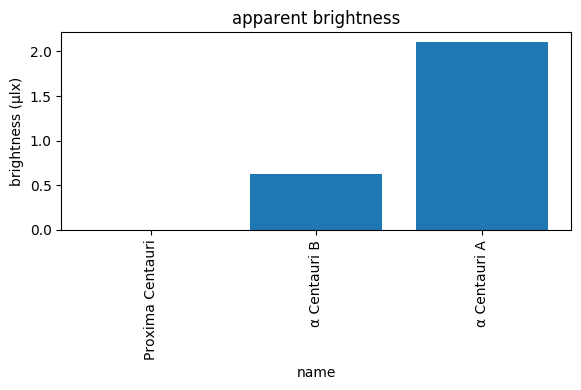

In [27]:
compareStars(neighbors)

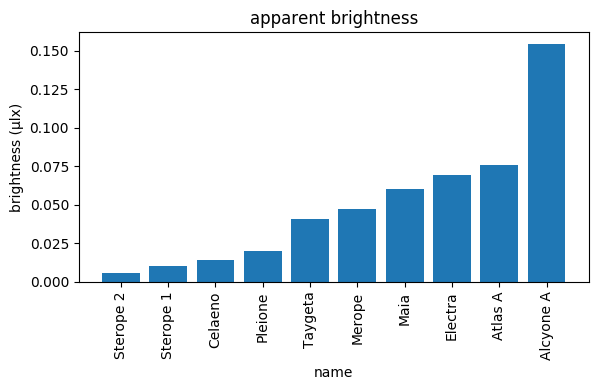

In [28]:
compareStars(pleiades)

### Summary

* Implementing special methods corresponding to arithmetic and logical operators lets us tailor how they work when applied to our user-defined objects.
* Defining our own type has many benefits over using a pre-defined types:   
   * greater control over access and functionality
   * cleaner, modular code 